## Observations and Insights 
1. Mouse x401 was treated with Capomulin.  According to the line graph as time increased, the tumor volume for that mouse decreased. The most dramatic change in the tumor volume was between timepoint 5 and 10. By the end of the treatment, the tumor was about 60% of its original size. 


2. The Scatter Plot and linear regression show that their is a strong correlation between the average weight of the mouse and the average tumor volume for the Capomulin Treatment. The relationship is that the more the mouse weighs, the larger the tumor.  A correlation coefficient of 0.71 is fairly strong (close to 1) and therefore supports a linear relationship between mouse weight and tumor volume for the Capomulon Treatment.


3. The bar graphs show that per treatment, about the same number of mice (24 or 25) were used. This means the experiement was done well to try and elimitate bais.  Wtth all groups a similar size, it is easier to make comparisons between the drug treatments. 

In [1]:
# Dependencies and Setup
%matplotlib inline 

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 6]
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import matplotlib.patches as mpatches

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
Combined_Results = mouse_metadata.merge(study_results, on="Mouse ID")

# Display the data table for preview
Combined_Results.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(Combined_Results["Mouse ID"].unique())



249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Duplicate_Mouse = Combined_Results.loc[Combined_Results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
Duplicate_Mouse


array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_df = Combined_Results[Combined_Results["Mouse ID"].isin(Duplicate_Mouse)==False]
Cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
Check = len(Cleaned_df["Mouse ID"].unique())
Check


248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
by_drug_mean = Cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
by_drug_mean

by_drug_median = Cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
by_drug_median

by_drug_var = Cleaned_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
by_drug_var

by_drug_sd = Cleaned_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
by_drug_sd

by_drug_SEM = Cleaned_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
by_drug_SEM

Summary_Statistics_Drugs = pd.DataFrame({
    "Mean": by_drug_mean,
    "Median": by_drug_median,
    "Variance": by_drug_var,
    "StandardDev": by_drug_sd,
    "SEM": by_drug_SEM    
})
Summary_Statistics_Drugs


,Mean,Median,Variance,StandardDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

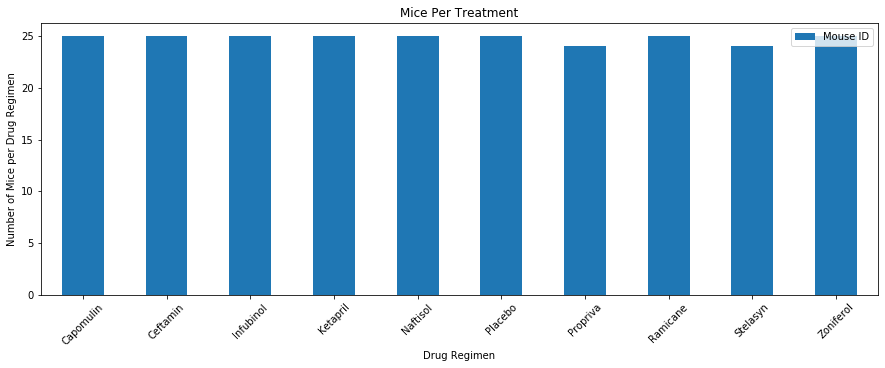

<Figure size 1080x432 with 0 Axes>

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
unique_mice_per_treatment = Cleaned_df.drop_duplicates(subset=['Mouse ID', 'Drug Regimen'], keep='first')
unique_mice_per_treatment

mice_per_treatment = unique_mice_per_treatment[["Drug Regimen", "Mouse ID"]]
mice_per_treatment
mice_per_treatment_count = mice_per_treatment.groupby("Drug Regimen").count()["Mouse ID"]
mice_per_treatment_count

Mice_count_by_Drug = pd.DataFrame(mice_per_treatment_count)
Mice_count_by_Drug


Mice_count_by_Drug.plot(kind="bar", figsize=(15,5), rot = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice per Drug Regimen")
plt.title("Mice Per Treatment")
plt.show()
plt.tight_layout()
plt.savefig("Bar Graph #1")

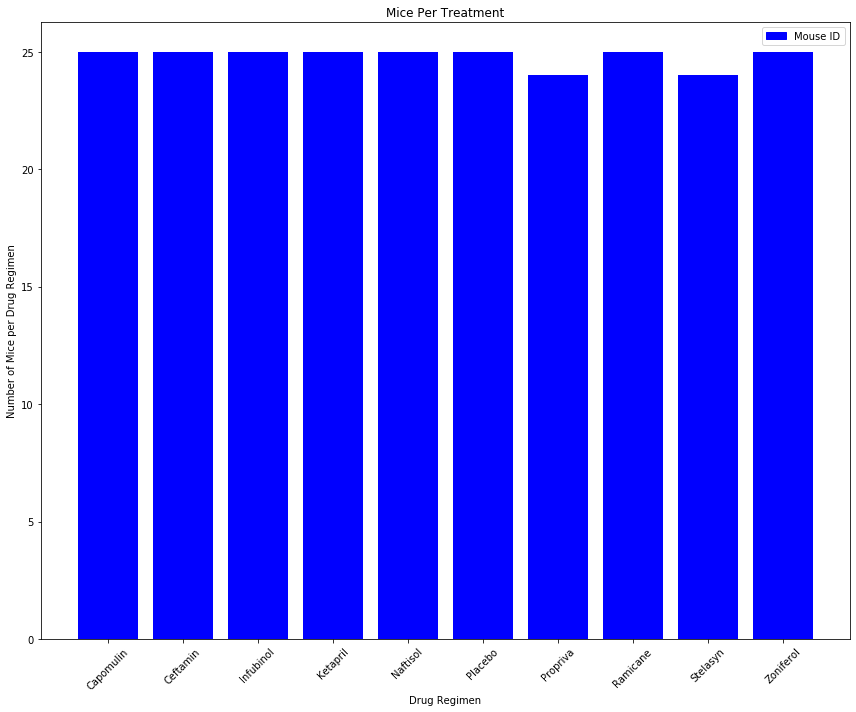

<Figure size 1080x432 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot
#This is giving me the wrong label for the bars
AllDrugs = Cleaned_df["Drug Regimen"].unique()
AlphaOrderDrugs = np.sort(AllDrugs)
AlphaOrderDrugs
x_axis = np.arange(len(Mice_count_by_Drug))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(12, 10))
plt.bar(x_axis, Mice_count_by_Drug["Mouse ID"], color='b', alpha=1, align="center")
plt.xticks(tick_locations, AlphaOrderDrugs, rotation="45")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice per Drug Regimen")
plt.title("Mice Per Treatment")


green_patch = mpatches.Patch(color='b', label='Mouse ID')
plt.legend(handles=[green_patch])

plt.tight_layout()
plt.show()
plt.savefig("Bar Graph #2")

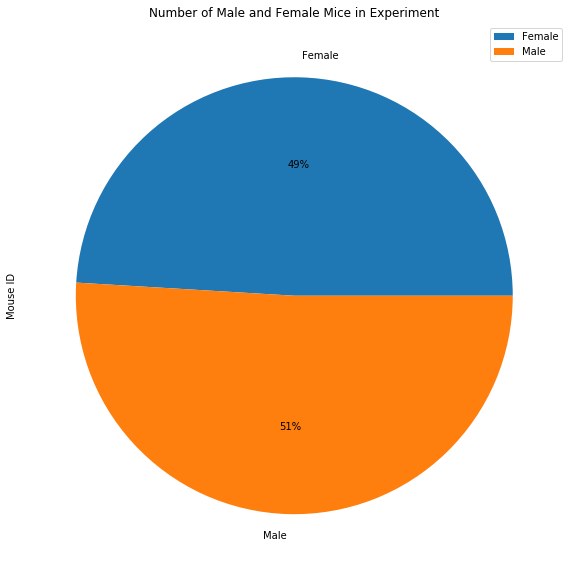

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Mice_Gender = Cleaned_df[["Mouse ID", "Sex"]]
Mice_Gender_count = Mice_Gender.groupby("Sex").count()["Mouse ID"]

Gender_Experiment = pd.DataFrame(Mice_Gender_count)
Gender_Experiment


Gender_Experiment.plot(kind = "pie", subplots = True, autopct="%1.0f%%",figsize = (8,8), yticks = None)
plt.tight_layout()
plt.title("Number of Male and Female Mice in Experiment")
plt.savefig("Pie Chart 1")
plt.show()


In [10]:
Gender_Experiment

,Mouse ID
Sex,
Female,922
Male,958


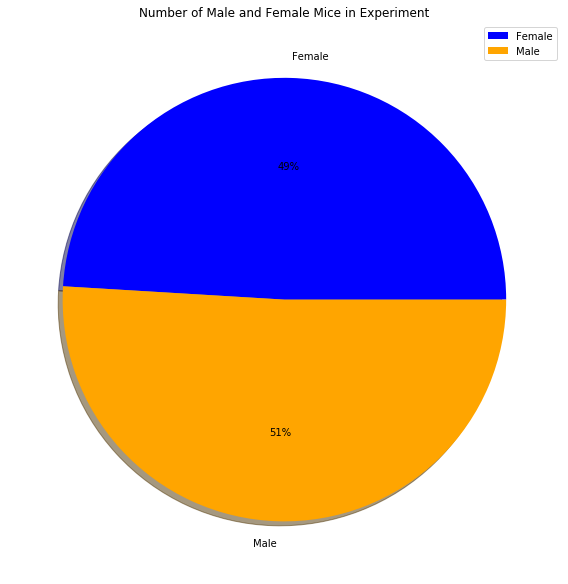

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Mice_Gender = Cleaned_df[["Mouse ID", "Sex"]]
Mice_Gender_count = Mice_Gender.groupby("Sex").count()["Mouse ID"]
Gender_Experiment = pd.DataFrame(Mice_Gender_count)

labels2 = ["Female", "Male"]
number_of_each_gender = Gender_Experiment["Mouse ID"]
colors2 = ["Blue", "Orange"]
plt.figure(figsize=(8, 8))
plt.pie(number_of_each_gender, explode=None, labels=labels2, colors=colors2, autopct="%1.0f%%", shadow=True, startangle=0)
plt.tight_layout()
plt.title("Number of Male and Female Mice in Experiment")
plt.legend(loc="upper right")
plt.savefig("Pie Chart 2")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
#Create DataFrame by location of the 4 top drugs
Capo_df = Cleaned_df.loc[Cleaned_df["Drug Regimen"]=="Capomulin",:]
Rami_df = Cleaned_df.loc[Cleaned_df["Drug Regimen"]=="Ramicane",:]
Infu_df = Cleaned_df.loc[Cleaned_df["Drug Regimen"]=="Infubinol",:]
Ceft_df = Cleaned_df.loc[Cleaned_df["Drug Regimen"]=="Ceftamin",:]

#Group the cleaned dataframe by mouse ID and max timepoint
mouse_id_index = Cleaned_df.groupby("Mouse ID").max()["Timepoint"]
#Create new dataframe from that groupby
merge_columns = pd.DataFrame(mouse_id_index)
merge_columns

#Merge drug and groupby data frames together got each drug.  Drop all NAN
Capomulin_Drugs_df = pd.merge(Capo_df, merge_columns, on = ("Mouse ID","Timepoint"), how = "right")
Final_Capo_Drugs = Capomulin_Drugs_df.dropna()
Final_Capo_Drugs.head()

Ramicane_Drugs_df = pd.merge(Rami_df, merge_columns, on = ("Mouse ID","Timepoint"), how = "right")
Final_Rami_Drugs = Ramicane_Drugs_df.dropna()
Final_Rami_Drugs.head()

Infubinol_Drugs_df = pd.merge(Infu_df, merge_columns, on = ("Mouse ID","Timepoint"), how = "right")
Final_Infu_Drugs = Infubinol_Drugs_df.dropna()
Final_Infu_Drugs.head()

Ceftamin_Drugs_df = pd.merge(Ceft_df, merge_columns, on = ("Mouse ID","Timepoint"), how = "inner")
Final_Ceft_Drugs = Ceftamin_Drugs_df.dropna()
Final_Ceft_Drugs.head()





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a275,Ceftamin,Female,20,28,45,62.999356,3
1,b447,Ceftamin,Male,2,30,0,45.000000,0
2,b487,Ceftamin,Female,6,28,25,56.057749,1
3,b759,Ceftamin,Female,12,25,30,55.742829,1
4,f436,Ceftamin,Female,3,25,15,48.722078,2


In [13]:
#Create a Series for each drug and their tumor volume for each mouse at the max timepoint
Tumor_Capo = Final_Capo_Drugs["Tumor Volume (mm3)"]
Tumor_Rami = Final_Rami_Drugs["Tumor Volume (mm3)"]
Tumor_Infu = Final_Infu_Drugs["Tumor Volume (mm3)"]
Tumor_Ceft = Final_Ceft_Drugs["Tumor Volume (mm3)"]



In [14]:
#Calculate Quartiles for each Drug Regimen
Quartiles_Capo = Tumor_Capo.quantile([.25, .50, .75])
Quartile_1_Capo = Quartiles_Capo[0.25].round(2)
Median_Capo = Quartiles_Capo[0.5].round(2)
Quartile_3_Capo = Quartiles_Capo[0.75].round(2)
iqr_Capo = (Quartile_3_Capo - Quartile_1_Capo).round(2)
lower_outlier_Capo = (Quartile_1_Capo - (1.5 * iqr_Capo)).round(2)
upper_outlier_Capo = (Quartile_3_Capo + (1.5 * iqr_Capo)).round(2)

Quartiles_Rami = Tumor_Rami.quantile([.25, .50, .75])
Quartile_1_Rami = Quartiles_Rami[0.25].round(2)
Median_Rami = Quartiles_Rami[0.5].round(2)
Quartile_3_Rami = Quartiles_Rami[0.75].round(2)
iqr_Rami = (Quartile_3_Rami - Quartile_1_Rami).round(2)
lower_outlier_Rami = (Quartile_1_Rami - (1.5 * iqr_Rami)).round(2)
upper_outlier_Rami = (Quartile_3_Rami + (1.5 * iqr_Rami)).round(2)

Quartiles_Infu = Tumor_Infu.quantile([.25, .50, .75])
Quartile_1_Infu = Quartiles_Infu[0.25].round(2)
Median_Infu = Quartiles_Infu[0.5].round(2)
Quartile_3_Infu = Quartiles_Infu[0.75].round(2)
iqr_Infu = (Quartile_3_Infu - Quartile_1_Infu).round(2)
lower_outlier_Infu = (Quartile_1_Infu - (1.5 * iqr_Infu)).round(2)
upper_outlier_Infu = (Quartile_3_Infu + (1.5 * iqr_Infu)).round(2)

Quartiles_Ceft = Tumor_Ceft.quantile([.25, .50, .75])
Quartile_1_Ceft = Quartiles_Ceft[0.25].round(2)
Median_Ceft = Quartiles_Ceft[0.5].round(2)
Quartile_3_Ceft= Quartiles_Ceft[0.75].round(2)
iqr_Ceft = (Quartile_3_Ceft - Quartile_1_Ceft).round(2)
lower_outlier_Ceft = (Quartile_1_Ceft - (1.5 * iqr_Ceft)).round(2)
upper_outlier_Ceft = (Quartile_3_Ceft + (1.5 * iqr_Ceft)).round(2)
#Print Results
print("CAPUMULIN")
print(f"The 1st quartile for Capomulin is {Quartile_1_Capo} mm3")
print(f"The median for Capimulin is {Median_Capo}")
print(f"The 3rd quartile Capomulin is {Quartile_3_Capo} mm3")
print(f"Thie Interquartile Range for Capomulin is {iqr_Capo} mm3")
print(f"Any values lower than {lower_outlier_Capo} could be an outlier")
print(f"Any values greater than {upper_outlier_Capo} could be an outlier")
print("-"* 80)
print("RAMICANE")
print(f"The 1st quartile for Ramicane is {Quartile_1_Rami} mm3")
print(f"The median for Ramicane is {Median_Rami}")
print(f"The 3rd quartile Ramicane is {Quartile_3_Rami} mm3")
print(f"Thie Interquartile Range for Ramicane is {iqr_Rami} mm3")
print(f"Any values lower than {lower_outlier_Rami} could be an outlier")
print(f"Any values greater than {upper_outlier_Rami} could be an outlier")
print("-"* 80)
print("INFUBINOL")
print(f"The 1st quartile for Infubinol is {Quartile_1_Infu} mm3")
print(f"The median for Infubinal is {Median_Infu}")
print(f"The 3rd quartile Infubinol is {Quartile_3_Infu} mm3")
print(f"Thie Interquartile Range for Infubinol is {iqr_Infu} mm3")
print(f"Any values lower than {lower_outlier_Infu} could be an outlier")
print(f"Any values greater than {upper_outlier_Infu} could be an outlier")
print("-"* 80)
print("CEFTAMIN")
print(f"The 1st quartile for Ceftamin is {Quartile_1_Ceft} mm3")
print(f"The median for Ceftamin is {Median_Ceft}")
print(f"The 3rd quartile Ceftamin is {Quartile_3_Ceft} mm3")
print(f"Thie Interquartile Range for Ceftamin is {iqr_Ceft} mm3")
print(f"Any values lower than {lower_outlier_Ceft} could be an outlier")
print(f"Any values greater than {upper_outlier_Ceft} could be an outlier")


CAPUMULIN
The 1st quartile for Capomulin is 32.38 mm3
The median for Capimulin is 38.13
The 3rd quartile Capomulin is 40.16 mm3
Thie Interquartile Range for Capomulin is 7.78 mm3
Any values lower than 20.71 could be an outlier
Any values greater than 51.83 could be an outlier
--------------------------------------------------------------------------------
RAMICANE
The 1st quartile for Ramicane is 31.56 mm3
The median for Ramicane is 36.56
The 3rd quartile Ramicane is 40.66 mm3
Thie Interquartile Range for Ramicane is 9.1 mm3
Any values lower than 17.91 could be an outlier
Any values greater than 54.31 could be an outlier
--------------------------------------------------------------------------------
INFUBINOL
The 1st quartile for Infubinol is 54.05 mm3
The median for Infubinal is 60.17
The 3rd quartile Infubinol is 65.53 mm3
Thie Interquartile Range for Infubinol is 11.48 mm3
Any values lower than 36.83 could be an outlier
Any values greater than 82.75 could be an outlier
------------

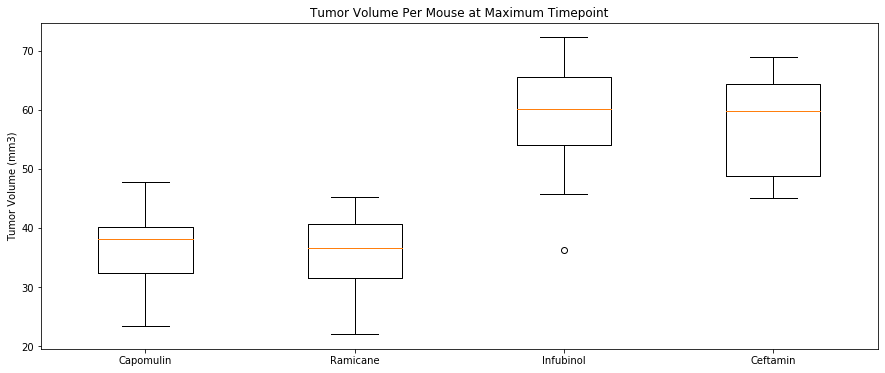

<Figure size 1080x432 with 0 Axes>

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Boxplot_data = [Tumor_Capo, Tumor_Rami, Tumor_Infu, Tumor_Ceft]
fig, ax = plt.subplots()
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.boxplot(Boxplot_data)
ax.set_ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Per Mouse at Maximum Timepoint")
plt.show()
plt.savefig("Boxplot")


## Line and Scatter Plots

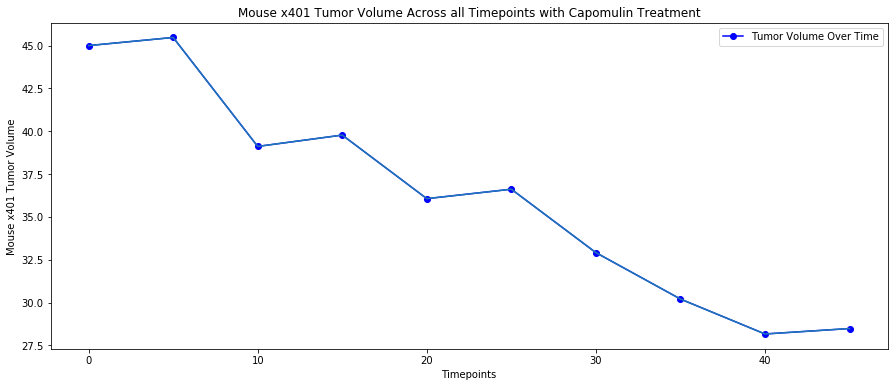

<Figure size 1080x432 with 0 Axes>

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = Cleaned_df[Cleaned_df["Drug Regimen"]=="Capomulin"]
Capomulin_df.head()

Mouse_ID_x401 = Capomulin_df[Capomulin_df["Mouse ID"]== "x401"]
Mouse_ID_x401

x_axis = Mouse_ID_x401["Timepoint"]
y_axis = Mouse_ID_x401["Tumor Volume (mm3)"]
len(x_axis)
len(y_axis)
line_handle, = plt.plot(x_axis, y_axis, marker ='o', color='blue', label="Tumor Volume Over Time")
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoints")
plt.ylabel("Mouse x401 Tumor Volume")
plt.title("Mouse x401 Tumor Volume Across all Timepoints with Capomulin Treatment")
plt.legend(loc = "upper right")
plt.show()
plt.savefig("Line Graph")



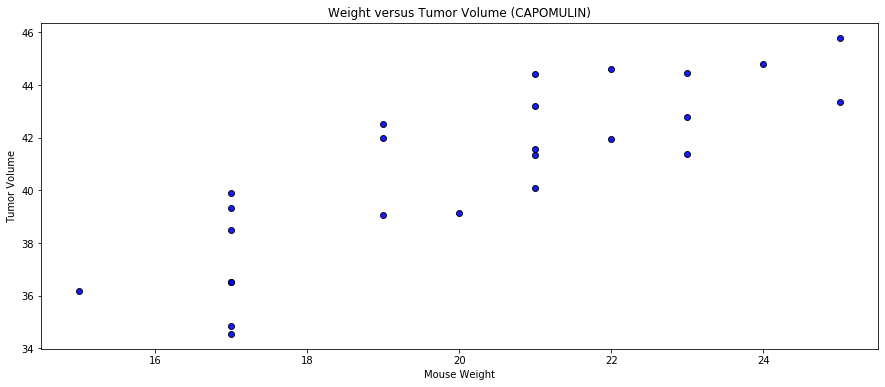

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = Cleaned_df[Cleaned_df["Drug Regimen"]=="Capomulin"]
Capomulin_df
Mouse_weight = Capomulin_df.groupby("Mouse ID").mean()["Weight (g)"]
Mouse_weight
Tumor_Volume_C = Capomulin_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
Tumor_Volume_C

plt.scatter(Mouse_weight, Tumor_Volume_C, marker="o", facecolors="blue", edgecolors="black",s=None, alpha=0.90)
plt.title("Weight versus Tumor Volume (CAPOMULIN)")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.savefig("Scatter Plot")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717
y = 0.95x + 21.55


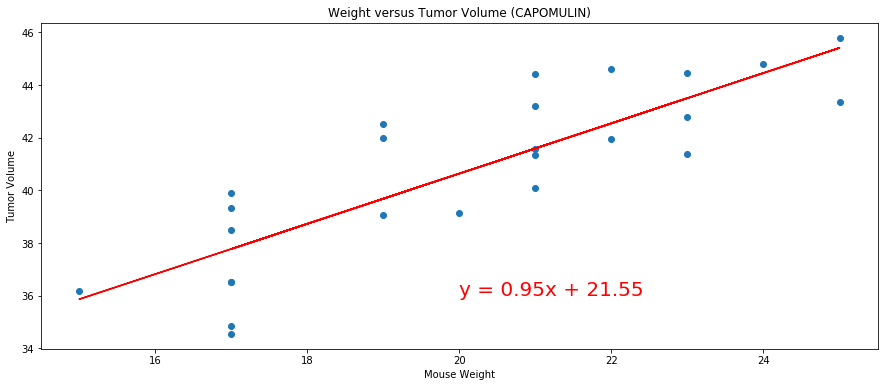

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Capomulin_df = Cleaned_df[Cleaned_df["Drug Regimen"]=="Capomulin"]
Capomulin_df
x_values = Mouse_weight
y_values = Tumor_Volume_C
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 36),fontsize=20,color="red")
plt.title("Weight versus Tumor Volume (CAPOMULIN)")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.savefig("Scatter Plot with Linear Regression")
plt.show()

